In [44]:
import csv
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon,MultiLineString
import fiona
import matplotlib.pyplot as plt
import imageio
import contextily as ctx
import numpy as np

In [2]:
strava_data = pd.read_csv('StravaInitial.csv')

In [3]:
strava_spatial=gpd.read_file("SpatialStrava.shp")

In [4]:
outline = gpd.read_file('NPS_-_Land_Resources_Division_Boundary_and_Tract_Data_Service.shp')
MORAoutline= outline.loc[outline['UNIT_CODE']=='MORA']
MORAoutline=MORAoutline.to_crs(epsg=4326)

In [5]:
strava_data = strava_data.rename(columns={'edge_uid': 'edgeUID'})

In [6]:
strava_spatial = strava_spatial.merge(strava_data, on='edgeUID')

<AxesSubplot:>

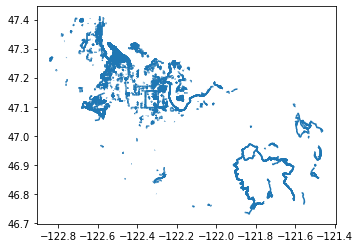

In [7]:
strava_spatial.plot()

In [8]:
MORAstrava = gpd.clip(strava_spatial, MORAoutline)

<AxesSubplot:>

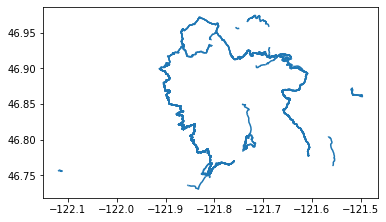

In [9]:
MORAstrava.plot()

In [10]:
list(MORAstrava.columns)

['edgeUID',
 'osmId',
 'geometry',
 'activity_type',
 'date',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_people_count',
 'reverse_people_count',
 'forward_hour_0_trip_count',
 'reverse_hour_0_trip_count',
 'forward_hour_1_trip_count',
 'reverse_hour_1_trip_count',
 'forward_hour_2_trip_count',
 'reverse_hour_2_trip_count',
 'forward_hour_3_trip_count',
 'reverse_hour_3_trip_count',
 'forward_hour_4_trip_count',
 'reverse_hour_4_trip_count',
 'forward_hour_5_trip_count',
 'reverse_hour_5_trip_count',
 'forward_hour_6_trip_count',
 'reverse_hour_6_trip_count',
 'forward_hour_7_trip_count',
 'reverse_hour_7_trip_count',
 'forward_hour_8_trip_count',
 'reverse_hour_8_trip_count',
 'forward_hour_9_trip_count',
 'reverse_hour_9_trip_count',
 'forward_hour_10_trip_count',
 'reverse_hour_10_trip_count',
 'forward_hour_11_trip_count',
 'reverse_hour_11_trip_count',
 'forward_hour_12_trip_count',
 'reverse_hour_12_trip_count',
 'forward_hour_13_trip_count',
 'reverse_hour_13_trip_co

In [11]:
MORAstrava['trip_count']=MORAstrava['forward_trip_count']+MORAstrava['reverse_trip_count']
MORAstrava['hr_0']=MORAstrava['forward_hour_0_trip_count']+MORAstrava['reverse_hour_0_trip_count']
MORAstrava['hr_1']=MORAstrava['forward_hour_1_trip_count']+MORAstrava['reverse_hour_1_trip_count']
MORAstrava['hr_2']=MORAstrava['forward_hour_2_trip_count']+MORAstrava['reverse_hour_2_trip_count']
MORAstrava['hr_3']=MORAstrava['forward_hour_3_trip_count']+MORAstrava['reverse_hour_3_trip_count']
MORAstrava['hr_4']=MORAstrava['forward_hour_4_trip_count']+MORAstrava['reverse_hour_4_trip_count']
MORAstrava['hr_5']=MORAstrava['forward_hour_5_trip_count']+MORAstrava['reverse_hour_5_trip_count']
MORAstrava['hr_6']=MORAstrava['forward_hour_6_trip_count']+MORAstrava['reverse_hour_6_trip_count']
MORAstrava['hr_7']=MORAstrava['forward_hour_7_trip_count']+MORAstrava['reverse_hour_7_trip_count']
MORAstrava['hr_8']=MORAstrava['forward_hour_8_trip_count']+MORAstrava['reverse_hour_8_trip_count']
MORAstrava['hr_9']=MORAstrava['forward_hour_9_trip_count']+MORAstrava['reverse_hour_9_trip_count']
MORAstrava['hr_10']=MORAstrava['forward_hour_10_trip_count']+MORAstrava['reverse_hour_10_trip_count']
MORAstrava['hr_11']=MORAstrava['forward_hour_11_trip_count']+MORAstrava['reverse_hour_11_trip_count']
MORAstrava['hr_12']=MORAstrava['forward_hour_12_trip_count']+MORAstrava['reverse_hour_12_trip_count']
MORAstrava['hr_13']=MORAstrava['forward_hour_13_trip_count']+MORAstrava['reverse_hour_13_trip_count']
MORAstrava['hr_14']=MORAstrava['forward_hour_14_trip_count']+MORAstrava['reverse_hour_14_trip_count']
MORAstrava['hr_15']=MORAstrava['forward_hour_15_trip_count']+MORAstrava['reverse_hour_15_trip_count']
MORAstrava['hr_16']=MORAstrava['forward_hour_16_trip_count']+MORAstrava['reverse_hour_16_trip_count']
MORAstrava['hr_17']=MORAstrava['forward_hour_17_trip_count']+MORAstrava['reverse_hour_17_trip_count']
MORAstrava['hr_18']=MORAstrava['forward_hour_18_trip_count']+MORAstrava['reverse_hour_18_trip_count']
MORAstrava['hr_19']=MORAstrava['forward_hour_19_trip_count']+MORAstrava['reverse_hour_19_trip_count']
MORAstrava['hr_20']=MORAstrava['forward_hour_20_trip_count']+MORAstrava['reverse_hour_20_trip_count']
MORAstrava['hr_21']=MORAstrava['forward_hour_21_trip_count']+MORAstrava['reverse_hour_21_trip_count']
MORAstrava['hr_22']=MORAstrava['forward_hour_22_trip_count']+MORAstrava['reverse_hour_22_trip_count']
MORAstrava['hr_23']=MORAstrava['forward_hour_23_trip_count']+MORAstrava['reverse_hour_23_trip_count']
MORAstrava['male']=MORAstrava['forward_male_people_count']+MORAstrava['reverse_male_people_count']
MORAstrava['female']=MORAstrava['forward_female_people_count']+MORAstrava['reverse_female_people_count']
MORAstrava['13_19']=MORAstrava['forward_13_19_people_count']+MORAstrava['reverse_13_19_people_count']
MORAstrava['20_34']=MORAstrava['forward_20_34_people_count']+MORAstrava['reverse_20_34_people_count']
MORAstrava['35_54']=MORAstrava['forward_35_54_people_count']+MORAstrava['reverse_35_54_people_count']
MORAstrava['55_64']=MORAstrava['forward_55_64_people_count']+MORAstrava['reverse_55_64_people_count']
MORAstrava['65']=MORAstrava['forward_65_plus_people_count']+MORAstrava['reverse_65_plus_people_count']
MORAstrava['avg_age']=((MORAstrava['13_19']*16)+(MORAstrava['20_34']*27)+(MORAstrava['35_54']*44)+(MORAstrava['55_64']*59)+(MORAstrava['65']*70))/MORAstrava['trip_count']
MORAstrava['gender_dif'] = MORAstrava['female']-MORAstrava['male']
MORAstrava['percent_gender_dif'] = (MORAstrava['female']-MORAstrava['male'])/MORAstrava['trip_count']


In [12]:
MORAstrava['trip_count'].sum()

6730

In [13]:
len(MORAstrava)

1166

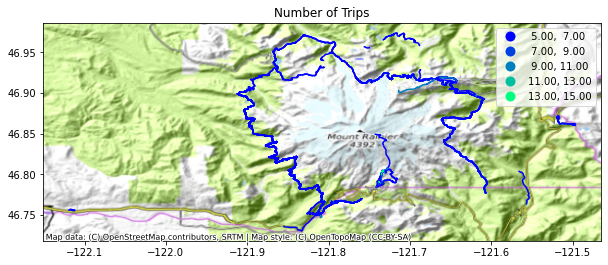

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='trip_count', ax=ax,cmap='winter',scheme='equalinterval',legend='True')
plt.title("Number of Trips")
ctx.add_basemap(ax,crs=4326,source=ctx.providers.OpenTopoMap,zoom=10)

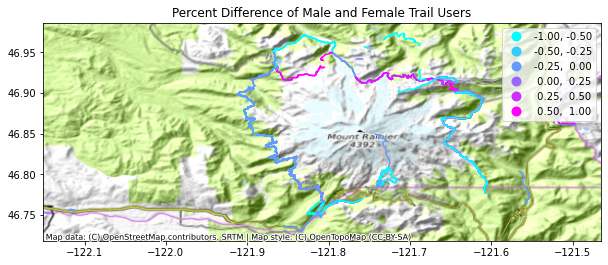

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='percent_gender_dif', ax=ax,cmap='cool',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[-0.5,-0.25,0,0.25,0.5,1]))
plt.title("Percent Difference of Male and Female Trail Users")
ctx.add_basemap(ax,crs=4326,source=ctx.providers.OpenTopoMap,zoom=10)

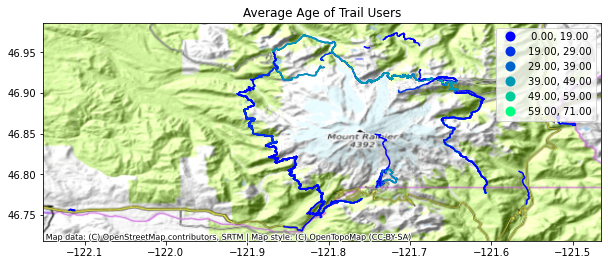

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='avg_age', ax=ax,cmap='winter',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[19,29,39,49,59]))
plt.title("Average Age of Trail Users")
ctx.add_basemap(ax,crs=4326,source=ctx.providers.OpenTopoMap,zoom=10)

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, '12 AM')

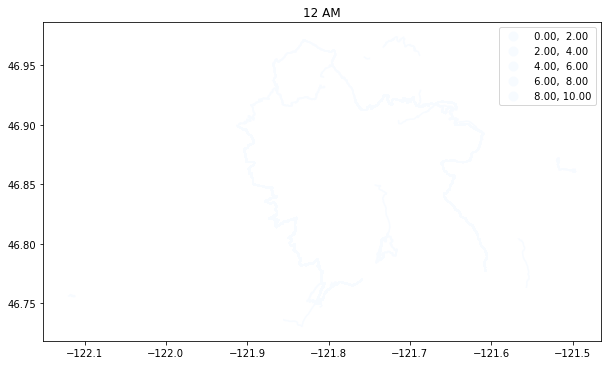

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_0', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("12 AM")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, '1 AM')

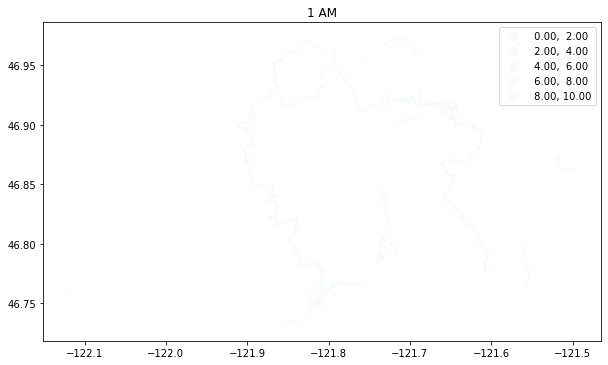

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_1', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("1 AM")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, '2 AM')

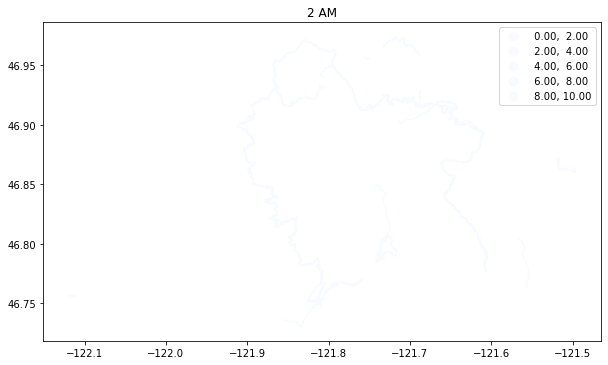

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_2', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("2 AM")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, '3 AM')

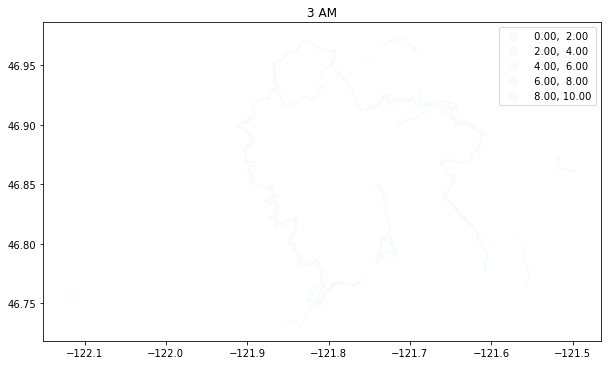

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_3', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("3 AM")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, '4 AM')

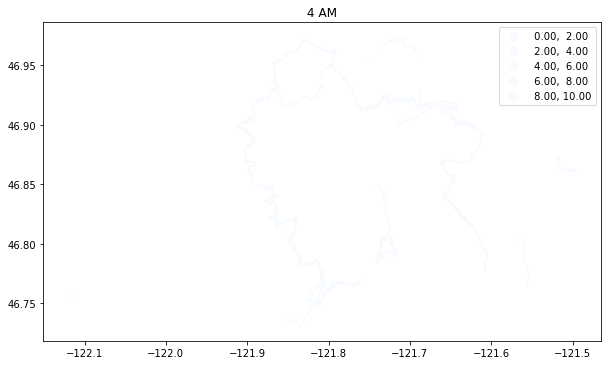

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_4', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("4 AM")

Text(0.5, 1.0, '5 AM')

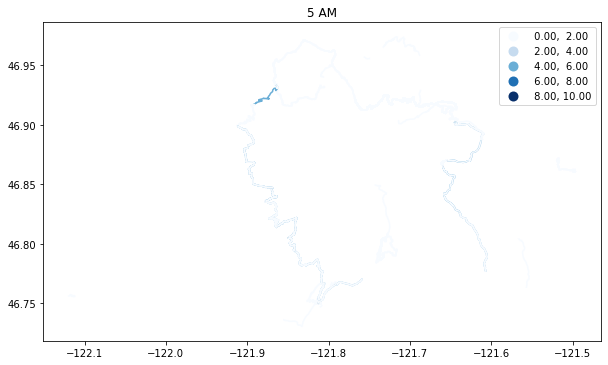

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_5', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("5 AM")

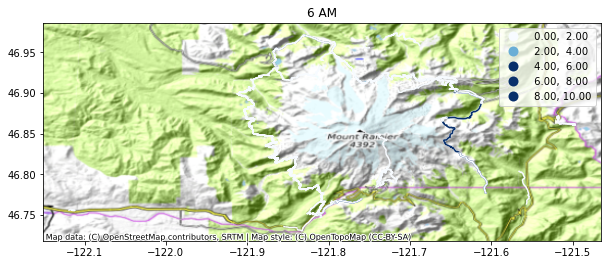

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_6', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("6 AM")
ctx.add_basemap(ax,crs=4326,source=ctx.providers.OpenTopoMap,zoom=10)

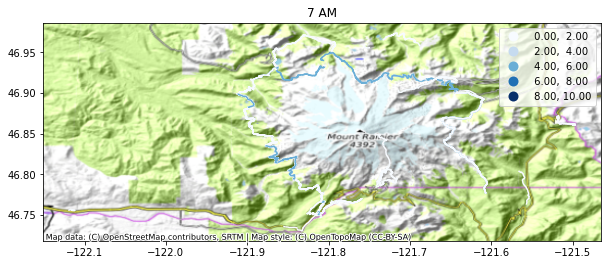

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_7', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("7 AM")
ctx.add_basemap(ax,crs=4326,source=ctx.providers.OpenTopoMap,zoom=10)

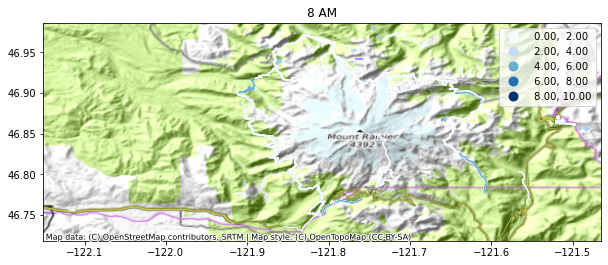

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_8', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("8 AM")
ctx.add_basemap(ax,crs=4326,source=ctx.providers.OpenTopoMap,zoom=10)

Text(0.5, 1.0, '9 AM')

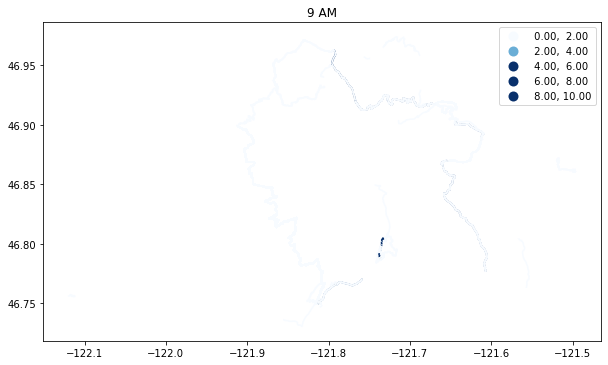

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_9', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("9 AM")

Text(0.5, 1.0, '10 AM')

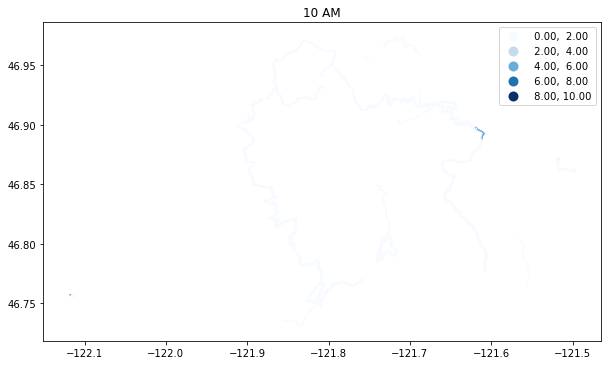

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_10', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("10 AM")

Text(0.5, 1.0, '11 AM')

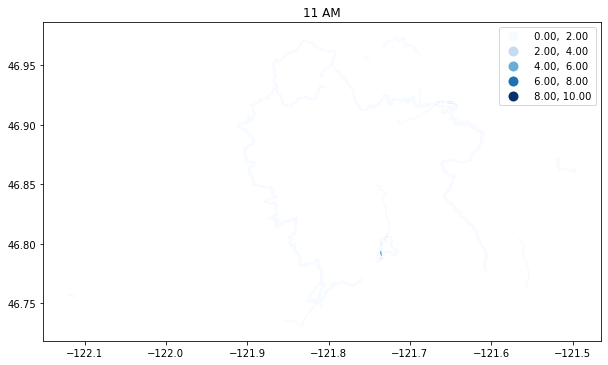

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_11', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("11 AM")

Text(0.5, 1.0, '12 PM')

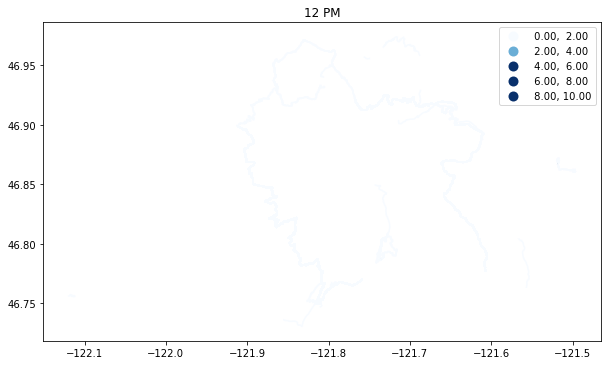

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_12', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("12 PM")

Text(0.5, 1.0, '1 PM')

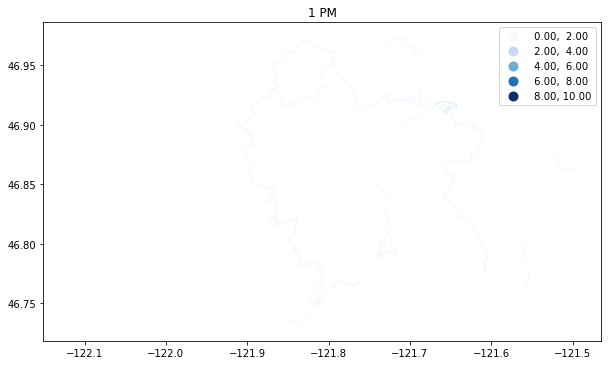

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_13', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("1 PM")

Text(0.5, 1.0, '2 PM')

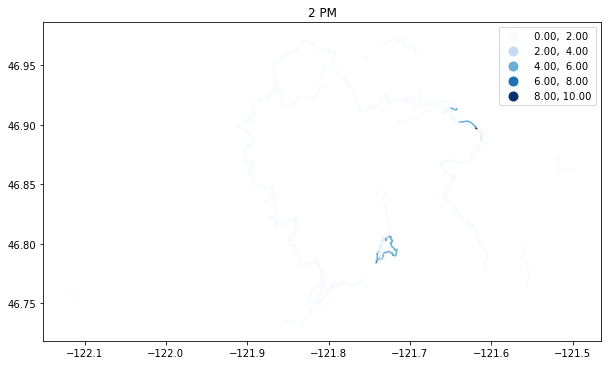

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_14', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("2 PM")

Text(0.5, 1.0, '3 PM')

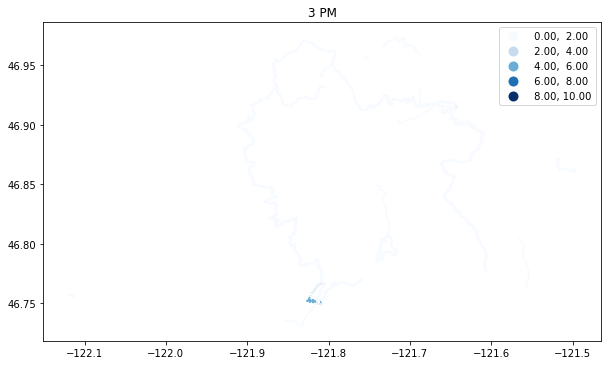

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_15', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("3 PM")

Text(0.5, 1.0, '4 PM')

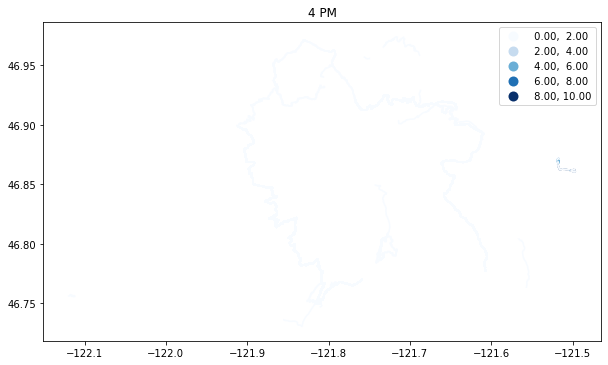

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_16', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("4 PM")

Text(0.5, 1.0, '5 PM')

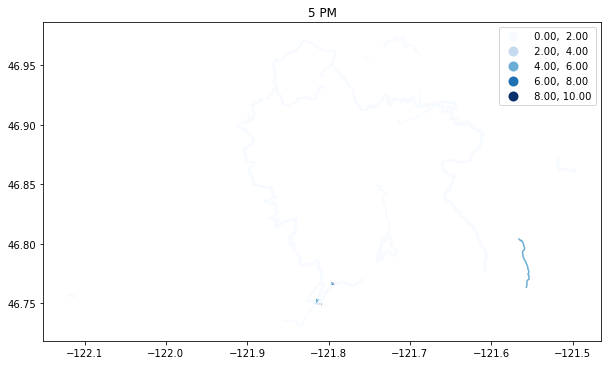

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_17', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("5 PM")

Text(0.5, 1.0, '6 PM')

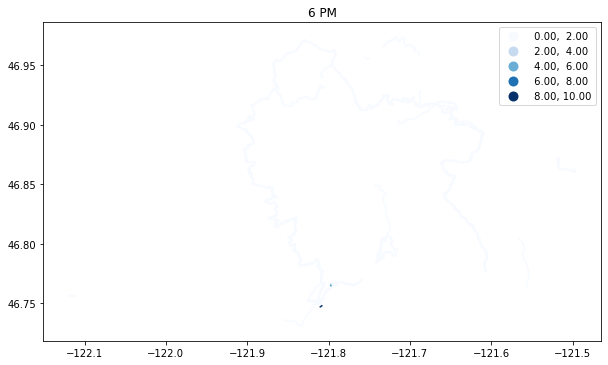

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_18', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("6 PM")

Text(0.5, 1.0, '7 PM')

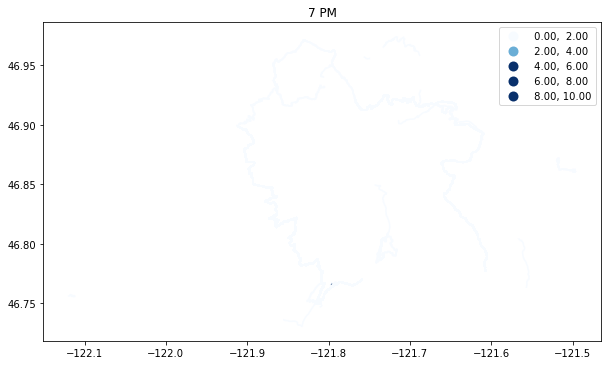

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_19', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("7 PM")

Text(0.5, 1.0, '8 PM')

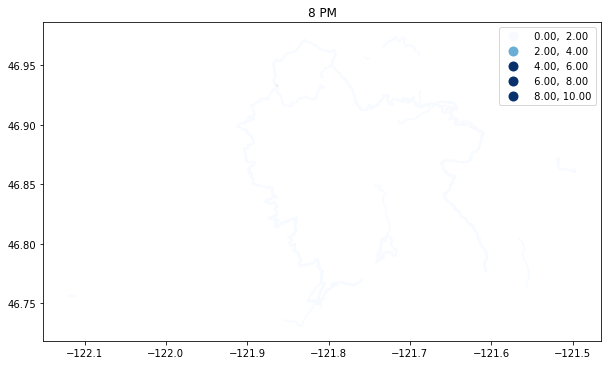

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_20', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("8 PM")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, '9 PM')

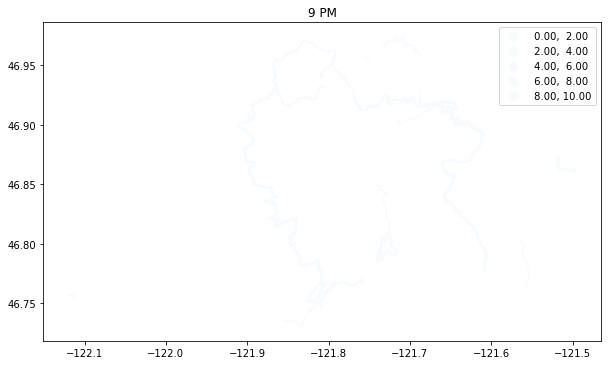

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_21', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("9 PM")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, '10 PM')

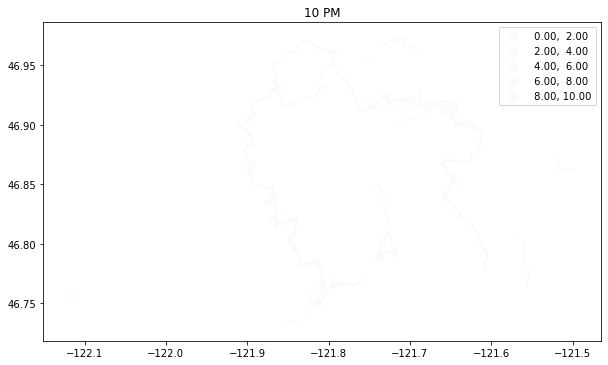

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_22', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("10 PM")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\mapclassify\classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


Text(0.5, 1.0, '11 PM')

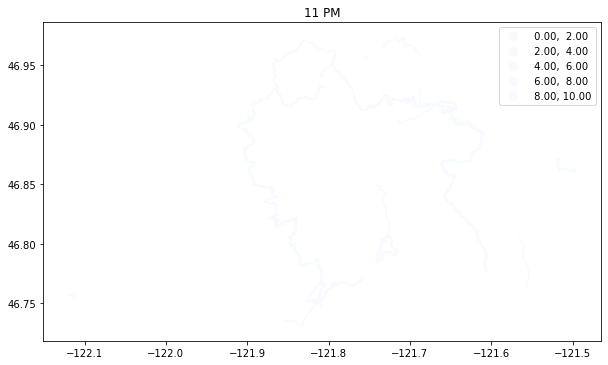

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
MORAstrava.plot(column='hr_23', ax=ax,cmap='Blues',scheme='User_Defined',legend='True',
                classification_kwds=dict(bins=[2,4,6,8,10]))
plt.title("11 PM")

In [41]:
MORAstrava.head()

,edgeUID,osmId,geometry,activity_type,date,forward_trip_count,reverse_trip_count,forward_people_count,reverse_people_count,forward_hour_0_trip_count,...,male,female,13_19,20_34,35_54,55_64,65,avg_age,gender_dif,percent_gender_dif
180,234973496,548934436,"LINESTRING (-121.50315 46.86161, -121.50329 46...",Run,2019-07-27,5,0,5,0,0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,-1.0
341,234971228,307873238,"LINESTRING (-121.79884 46.96160, -121.79906 46...",Run,2019-08-03,5,0,5,0,0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,-1.0
342,234971228,307873238,"LINESTRING (-121.79884 46.96160, -121.79906 46...",Run,2019-08-04,0,5,0,5,0,...,5.0,0.0,0.0,0.0,5.0,0.0,0.0,44.0,-5.0,-1.0
343,234971228,307873238,"LINESTRING (-121.79884 46.96160, -121.79906 46...",Run,2019-08-16,0,5,0,5,0,...,5.0,0.0,0.0,0.0,5.0,0.0,0.0,44.0,-5.0,-1.0
505,234970983,179370595,"LINESTRING (-121.64858 46.91526, -121.64791 46...",Run,2019-09-21,5,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


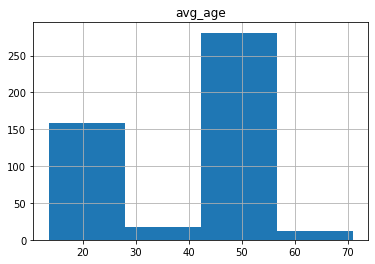

In [45]:
MORAstrava['avg_age'].replace(0, np.nan, inplace=True)
hist = MORAstrava.hist(column='avg_age',bins=4)